In [41]:
# Importing Required Libraries

# Libraries required for Loading the data and for EDA
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import scipy.stats as st

# Import the preprocessing module
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Libraries required for Modelling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import tree, model_selection
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *

# Libraries required for scoring
from pycaret.classification import plot_model
from pycaret.classification import evaluate_model
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

#Others
import re
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from nltk.corpus import stopwords
from __future__ import unicode_literals

**Step 2:** Read the dataset.csv data from the Resources folder into a Pandas DataFrame.

In [42]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('restaurants_with_sentiment.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail)
display(df.head())
display(df.tail())

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,the food met my expectation the seating area w...,0.9607,Good
1,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,2,its a wendys their food is good better than mc...,0.1966,Bad
2,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,3,i love the taste of this food as it tastes lik...,0.8198,Good
3,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,this is the best wendys ive ever been to incre...,0.9287,Good
4,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,i been here so many times i never had a proble...,0.5613,Good


,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
5015,Planète Poutine Et Cie,American,"4225 Boulevard Des Forges, Trois-Rivières, QC G8Y",QC,46.356211,-72.589133,5,grabbed a mexican poutine the portion was unbe...,0.7902,Good
5016,Planète Poutine Et Cie,American,"4225 Boulevard Des Forges, Trois-Rivières, QC G8Y",QC,46.356211,-72.589133,5,excellenent customer service from the owner an...,0.0000,Bad
5017,Planète Poutine Et Cie,American,"4225 Boulevard Des Forges, Trois-Rivières, QC G8Y",QC,46.356211,-72.589133,5,excellent service,0.5719,Good
5018,Planète Poutine Et Cie,American,"4225 Boulevard Des Forges, Trois-Rivières, QC G8Y",QC,46.356211,-72.589133,5,super service,0.5994,Good
5019,Planète Poutine Et Cie,American,"4225 Boulevard Des Forges, Trois-Rivières, QC G8Y",QC,46.356211,-72.589133,5,super,0.5994,Good


**Step 3**: Perform Exploratory Data Analysis (EDA)old text

This step includes generating descriptive statistics, visualizing the data, checking for multicollinearity etc.

In [43]:
# Generating descriptive statistics
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
count,5020,5020,5020,5020,5020.000000,5020.000000,5020.000000,5009,5020.000000,5020
unique,967,96,954,6,NaN,NaN,NaN,4733,NaN,2
top,Curry Up Now,American,"701 Memorial Ave , Unit 4, Thunder Bay, ON P7B",ON,NaN,NaN,NaN,food was amazing service was very slowintermit...,NaN,Good
freq,10,555,20,2423,NaN,NaN,NaN,4,NaN,3682
mean,NaN,NaN,NaN,NaN,46.750274,-89.249044,3.838446,NaN,0.577437,NaN
std,NaN,NaN,NaN,NaN,3.180802,18.086217,1.534227,NaN,0.575615,NaN
min,NaN,NaN,NaN,NaN,42.232002,-123.532571,1.000000,NaN,-0.989800,NaN
25%,NaN,NaN,NaN,NaN,44.232733,-112.813573,3.000000,NaN,0.440400,NaN
50%,NaN,NaN,NaN,NaN,46.341849,-80.963151,5.000000,NaN,0.875000,NaN
75%,NaN,NaN,NaN,NaN,49.250878,-75.760262,5.000000,NaN,0.954500,NaN


In [44]:
# Checking the data types for each features
df.dtypes

Restaurant_Name     object
Category            object
Address             object
Province            object
Latitude           float64
Longitude          float64
Rating               int64
Review              object
Sentiment_score    float64
Sentiment           object
dtype: object

In [45]:
# Determine the number of unique values in each column.
df.nunique()

Restaurant_Name     967
Category             96
Address             954
Province              6
Latitude            915
Longitude           915
Rating                5
Review             4733
Sentiment_score    2165
Sentiment             2
dtype: int64

In [46]:
# Check the category for 'Targets'
type_counts = df['Sentiment'].value_counts()
type_counts

Good    3682
Bad     1338
Name: Sentiment, dtype: int64

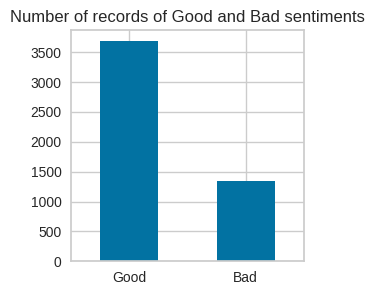

In [47]:
# Visualize the 'Sentiment' data
df["Sentiment"].value_counts().plot(kind="bar", figsize=(3,3), title="Number of records of Good and Bad sentiments")
plt.xticks(rotation=0)
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  5020 non-null   object 
 1   Category         5020 non-null   object 
 2   Address          5020 non-null   object 
 3   Province         5020 non-null   object 
 4   Latitude         5020 non-null   float64
 5   Longitude        5020 non-null   float64
 6   Rating           5020 non-null   int64  
 7   Review           5009 non-null   object 
 8   Sentiment_score  5020 non-null   float64
 9   Sentiment        5020 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 392.3+ KB


In [49]:
# Convert 'Good' to 1, and 'Bad' to 0
df['Sentiment'] = df['Sentiment'].map({'Good': 1, 'Bad': 0})
df.head()

,Restaurant_Name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,the food met my expectation the seating area w...,0.9607,1
1,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,2,its a wendys their food is good better than mc...,0.1966,0
2,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,3,i love the taste of this food as it tastes lik...,0.8198,1
3,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,this is the best wendys ive ever been to incre...,0.9287,1
4,Wendy's (10365 111th Street),Fast food,"10365 111th Street, Edmonton, AB T5K 2V3",AB,53.545878,-113.510914,5,i been here so many times i never had a proble...,0.5613,1


In [50]:
unique_Sentiment = df['Sentiment'].unique()
print(unique_Sentiment)

[1 0]


In [51]:
#Review Counts Per Category
Category = df['Category'].str.upper()
Category.value_counts().head(10)

AMERICAN                555
PIZZA                   515
INDIAN                  310
BURGERS                 309
BREAKFAST AND BRUNCH    290
COMFORT FOOD            197
FAST FOOD               180
CHINESE                 150
MEXICAN                 140
BAKERY                  130
Name: Category, dtype: int64

**Word Cloud.** Frequency of popular words.

In [52]:
text = df.Review[0]

In [53]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

In [54]:
#To build a wordcloud, we have to remove NULL values first:
df["Review"] = df["Review"].fillna(value="")

In [55]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['Review'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

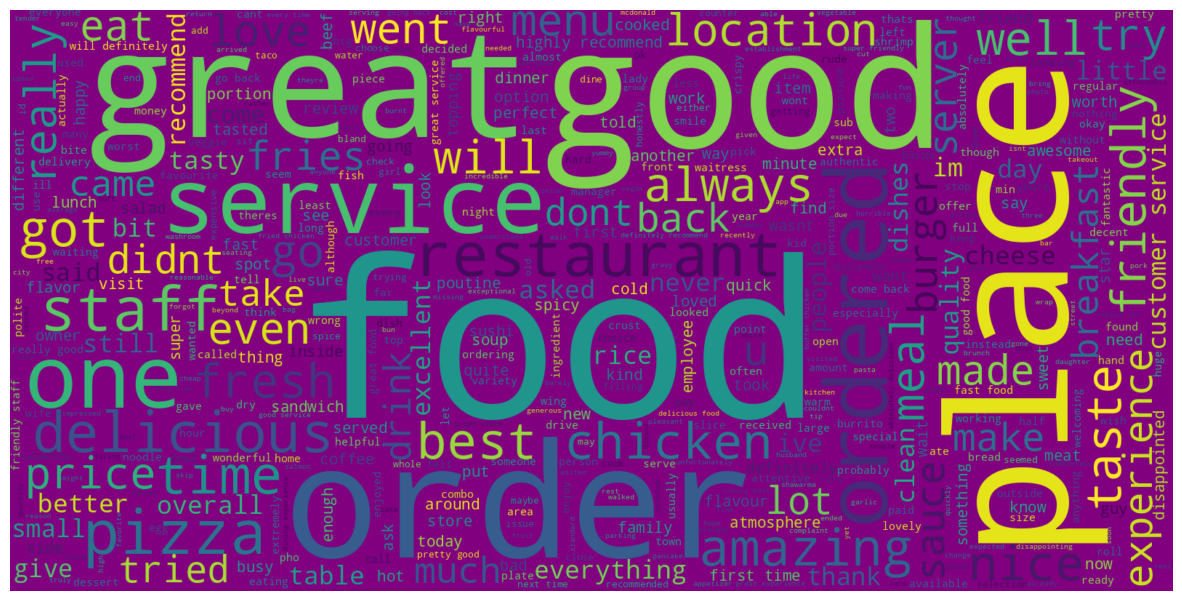

In [56]:
#And - plotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

Split data-set to train and test

In [58]:
X = df['Review']
Y = df['Sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Data cleaning